In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Q1.1) Read the dataset. Do the descriptive statistics and do null value condition check.

In [3]:
df = pd.read_csv('Election_Data.csv')

In [4]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
df = df.drop('Unnamed: 0',axis = 1)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df_exp = df.copy()

### Descriptive Stats: -

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df.shape

(1525, 9)

In [9]:
df_describe = df.describe().T

In [10]:
df_describe['IQR'] = df_describe['75%'] - df_describe['25%']
df_describe['COV'] = df_describe['std']/df_describe['mean']

In [11]:
df_describe

,count,mean,std,min,25%,50%,75%,max,IQR,COV
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0,26.0,0.289969
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0,1.0,0.271410
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0,1.0,0.296132
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0,2.0,0.352332
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0,2.0,0.448036
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0,6.0,0.490083
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0,2.0,0.702404


### Null value check: -

In [12]:
pd.DataFrame(df.isnull().sum(), columns = ['Null Values'])

,Null Values
vote,0
age,0
economic.cond.national,0
economic.cond.household,0
Blair,0
Hague,0
Europe,0
political.knowledge,0
gender,0


In [13]:
df.isnull().sum().sum()

0

# 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each

### Checking for Duplicates: -

In [14]:
print('No of duplicates in the data:',df.duplicated().sum())

No of duplicates in the data: 8


In [15]:
df.drop_duplicates(inplace = True)
print('No of duplicates after deleting:', df.duplicated().sum())

No of duplicates after deleting: 0


### Univariate and Bivariate analysis:-

#### Univariate

In [16]:
def univariate(col):
    print('Description of',col,' is: -')
    print(df[col].describe())
    print(' ')
    print('-----------------------------------------------------------')
    print("Mean is: ", df[col].mean())
    print("Median is: ", df[col].median())
    print("Mode is: ", df[col].mode()[0])
    print('-----------------------------------------------------------')
    print(" ")
    
    print("Distribution of ", col, ' is: -')
    
    sns.displot(x = df[col], kde = True,height=3)
    plt.axvline(x = df[col].mean(), color = 'green',label = 'mean')
    plt.axvline(x = df[col].median(), color = 'red', label = 'median')
    plt.axvline(x = df[col].mode()[0], color = 'yellow', label = 'mode')
    plt.legend()
    plt.show()
    
    print('-----------------------------------------------------------')
    print(' ')
    print('Boxplot of',col,' is: -')
    plt.figure(figsize = (4,3))
    sns.boxplot(x = df[col],width = .6)
    plt.show()
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    print(' ')

Description of age  is: -
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64
 
-----------------------------------------------------------
Mean is:  54.2412656558998
Median is:  53.0
Mode is:  37
-----------------------------------------------------------
 
Distribution of  age  is: -


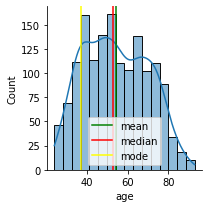

-----------------------------------------------------------
 
Boxplot of age  is: -


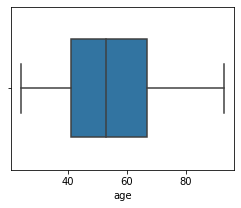

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of economic.cond.national  is: -
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64
 
-----------------------------------------------------------
Mean is:  3.245220830586684
Median is:  3.0
Mode is:  3
-----------------------------------------------------------
 
Distribution of  economic.cond.national  is: -


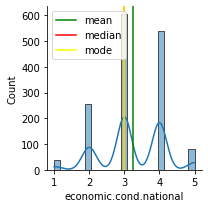

-----------------------------------------------------------
 
Boxplot of economic.cond.national  is: -


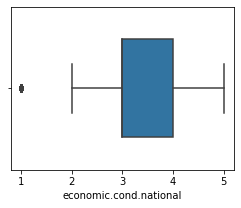

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of economic.cond.household  is: -
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64
 
-----------------------------------------------------------
Mean is:  3.1377719182597232
Median is:  3.0
Mode is:  3
-----------------------------------------------------------
 
Distribution of  economic.cond.household  is: -


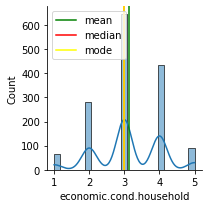

-----------------------------------------------------------
 
Boxplot of economic.cond.household  is: -


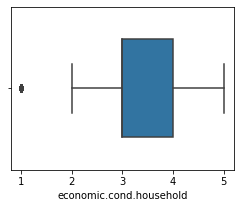

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of Blair  is: -
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64
 
-----------------------------------------------------------
Mean is:  3.3355306526038233
Median is:  4.0
Mode is:  4
-----------------------------------------------------------
 
Distribution of  Blair  is: -


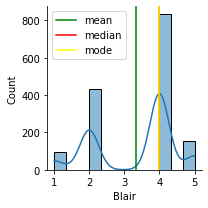

-----------------------------------------------------------
 
Boxplot of Blair  is: -


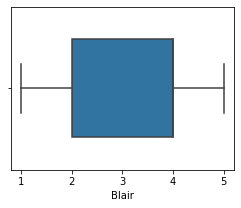

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of Hague  is: -
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64
 
-----------------------------------------------------------
Mean is:  2.7495056031641396
Median is:  2.0
Mode is:  2
-----------------------------------------------------------
 
Distribution of  Hague  is: -


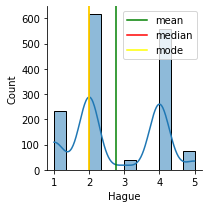

-----------------------------------------------------------
 
Boxplot of Hague  is: -


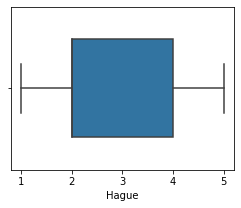

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of Europe  is: -
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64
 
-----------------------------------------------------------
Mean is:  6.7402768622280815
Median is:  6.0
Mode is:  11
-----------------------------------------------------------
 
Distribution of  Europe  is: -


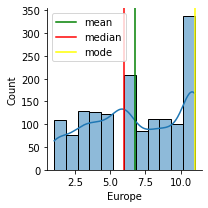

-----------------------------------------------------------
 
Boxplot of Europe  is: -


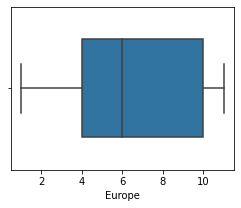

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of political.knowledge  is: -
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64
 
-----------------------------------------------------------
Mean is:  1.5405405405405406
Median is:  2.0
Mode is:  2
-----------------------------------------------------------
 
Distribution of  political.knowledge  is: -


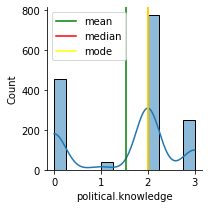

-----------------------------------------------------------
 
Boxplot of political.knowledge  is: -


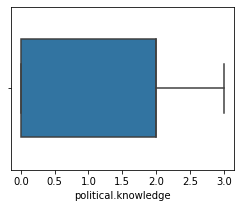

-----------------------------------------------------------
-----------------------------------------------------------
 


In [17]:
for i in df.select_dtypes(include = ['int64','float64']):
    univariate(i)

#### Bivariate

In [18]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


#### Checking unique values

In [19]:
i = ['vote','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']

In [20]:
for j in i:
    print(j.upper())
    print(df[j].value_counts())
    print('')

VOTE
Labour          1057
Conservative     460
Name: vote, dtype: int64

ECONOMIC.COND.NATIONAL
3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

ECONOMIC.COND.HOUSEHOLD
3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

BLAIR
4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

HAGUE
2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

EUROPE
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

POLITICAL.KNOWLEDGE
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

GENDER
female    808
male      709
Name: gender, dtype: int64



#### Most of the variables are based on a rating scale

#### Age vs vote

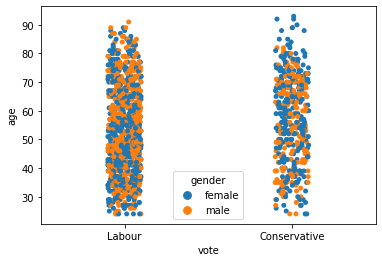

In [21]:
sns.stripplot(x = df.vote, y = df.age, hue = df.gender);

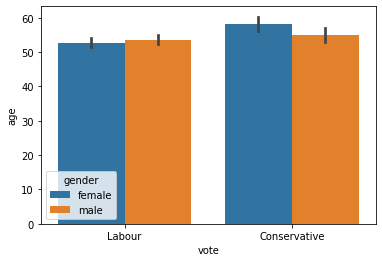

In [22]:
sns.barplot(x = df.vote, y = df.age, hue = df.gender);

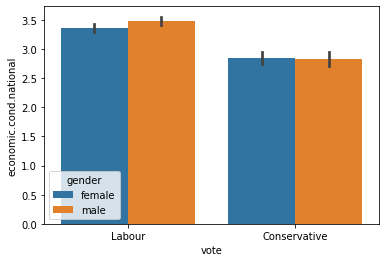

In [23]:
sns.barplot(x = df.vote, y = df['economic.cond.national'], hue = df.gender);

<AxesSubplot:xlabel='vote', ylabel='economic.cond.household'>

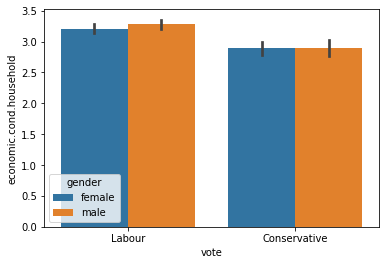

In [24]:
sns.barplot(x = df.vote, y = df['economic.cond.household'], hue = df.gender)

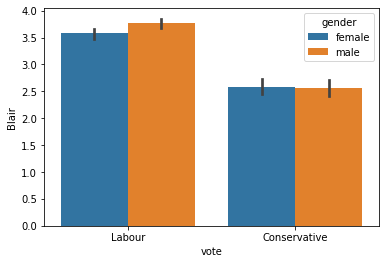

In [25]:
sns.barplot(y = df.Blair,x = df.vote, hue = df.gender);

<AxesSubplot:xlabel='vote', ylabel='Hague'>

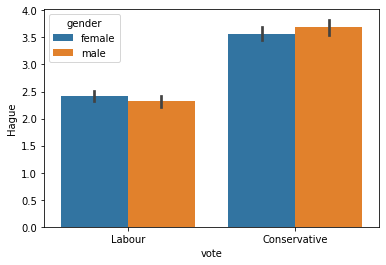

In [26]:
sns.barplot(x = df.vote, y = df.Hague, hue = df.gender)

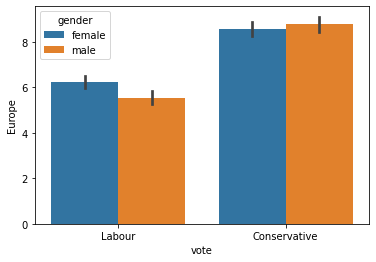

In [27]:
sns.barplot(x = df.vote, y = df.Europe, hue = df.gender);

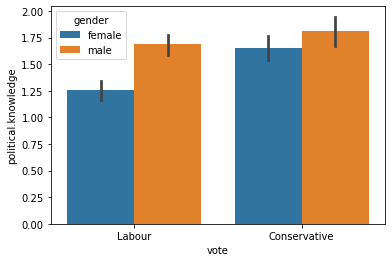

In [28]:
sns.barplot(x = df.vote, y = df['political.knowledge'], hue = df.gender);

### Corelation

<AxesSubplot:>

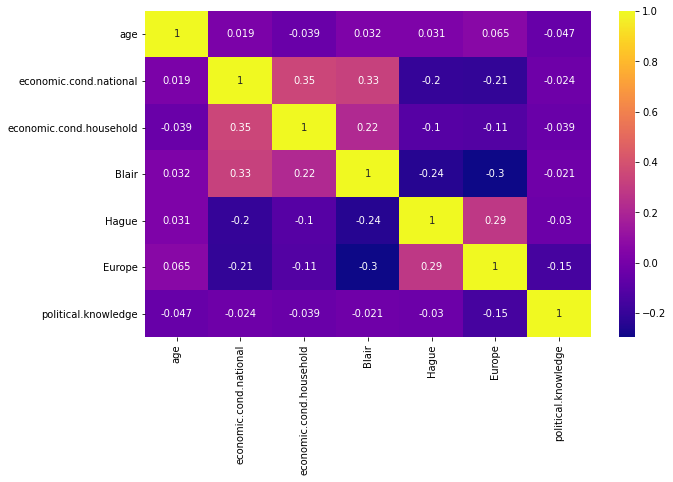

In [29]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap = 'plasma', annot = True )

### Pairplot

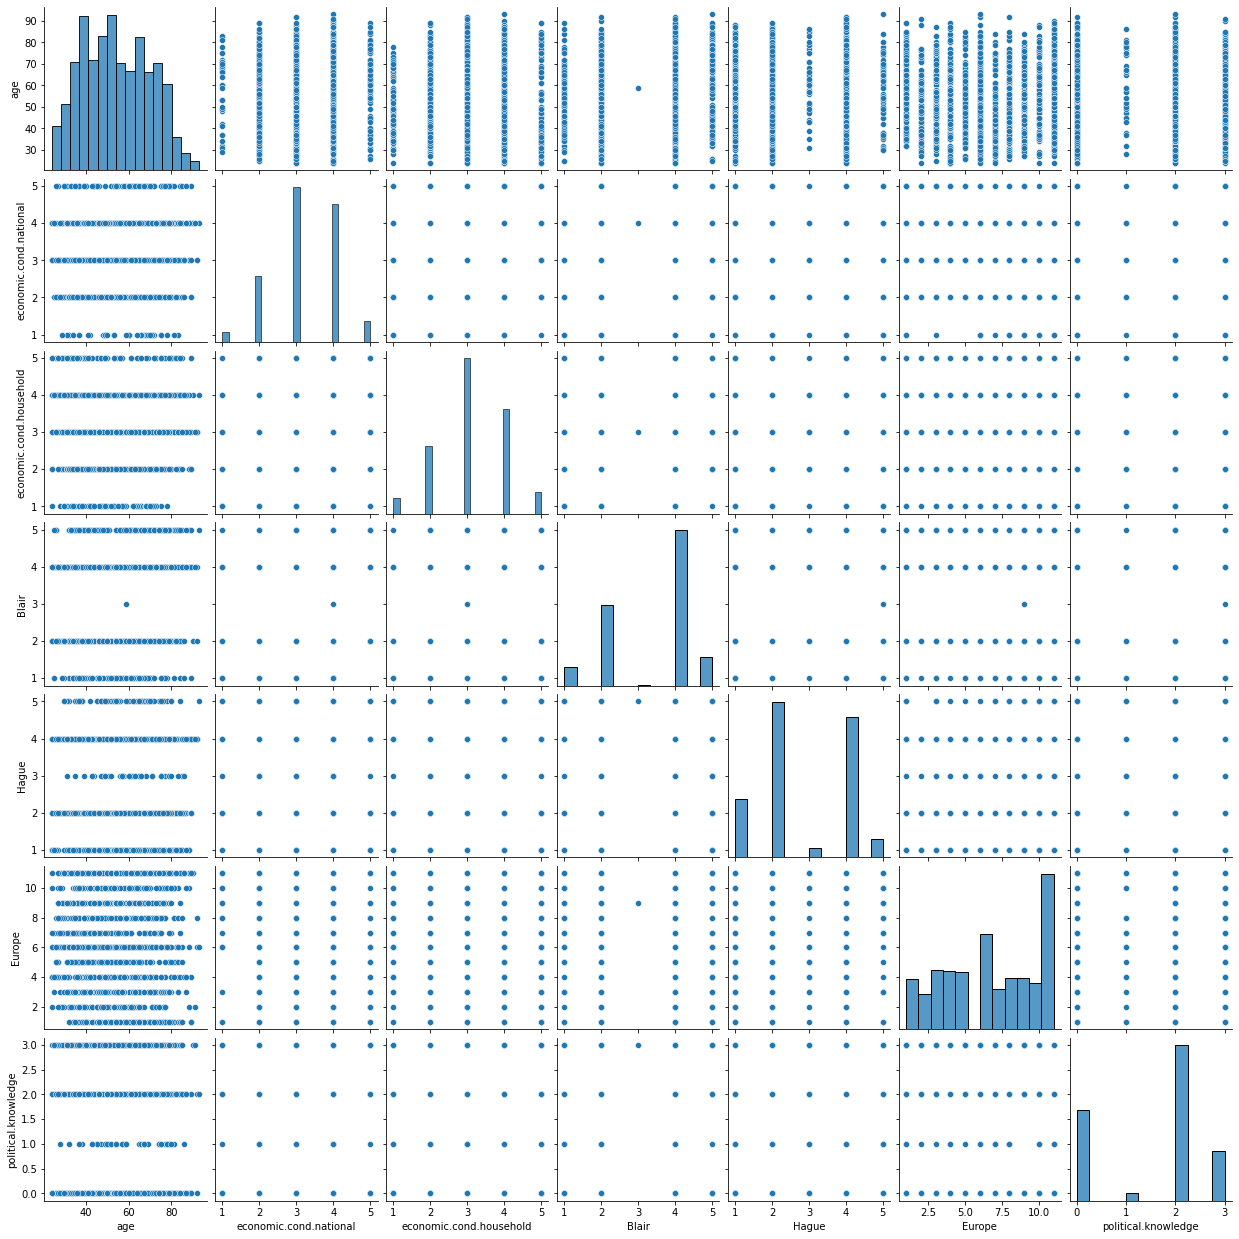

In [33]:
sns.pairplot(data = df);

## Outlier Detection

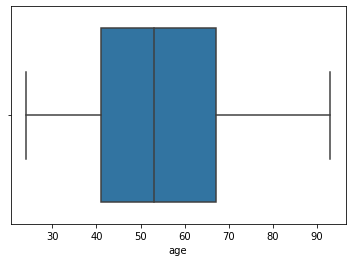

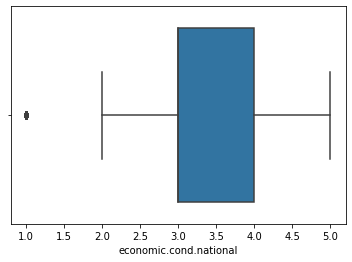

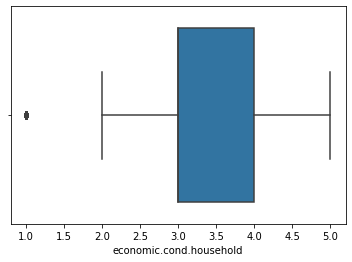

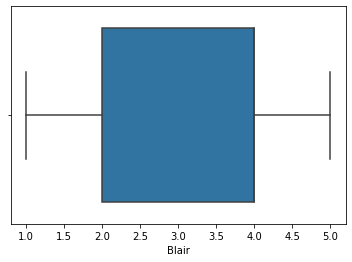

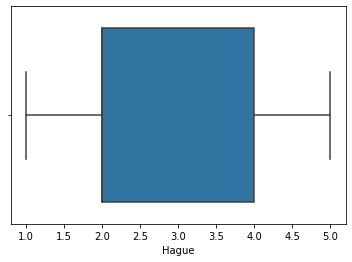

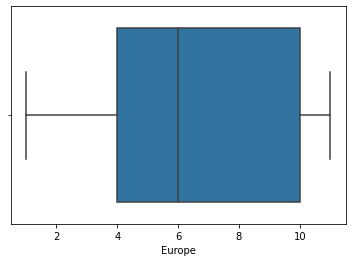

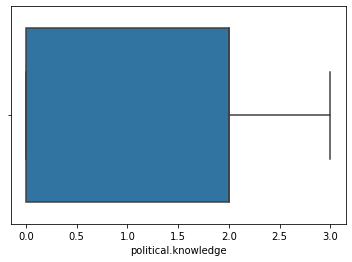

In [34]:
for i in df.select_dtypes(include = ['int64','float64']):
    sns.boxplot(x = df[i])
    plt.show()
    print('\n')

#### Only two outliers present in the data, and that too in the columns that represent the rating. Thus it is of no harm

# Q1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 3 pts), Data Split: Split the data into train and test (70:30) .

In [35]:
for i in df.select_dtypes('object'):
    df[i] = pd.Categorical(df[i]).codes

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 137.8 KB


In [37]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [38]:
df.vote.value_counts(normalize = True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

The class seems to be unbalanced, it would be wise to apply SMOTE and test our data with it too.

- Labour 1, Conservative 0
- Female 0, Male 1

### Scaling

- Scaling depends upon the type of algorithm used
- Except age, all variables lie in the scale of 0-10
- ALso, in this scale scaling would be applicable, if any distane based model or weight based model is being used
- Whether to scale or not will be decided according to the algortihm asked to model

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('vote',axis = 1)
Y = df.vote

In [41]:
x_train, x_test, train_labels, test_labels = train_test_split(X, Y, test_size = .3)

### Preparing data with SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
oversample = SMOTE()
x_bal, y_bal = oversample.fit_sample(X, Y)

In [44]:
y_bal.value_counts(normalize = True)

1    0.5
0    0.5
Name: vote, dtype: float64

In [45]:
x_train_bal, x_test_bal, train_lab_bal, test_lab_bal = train_test_split(x_bal, y_bal, test_size = .3)

# 1.4 . Apply Logistic Regression and LDA (linear discriminant analysis).

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter = 200)

In [47]:
logit.fit(x_train, train_labels)

LogisticRegression(max_iter=200)

In [48]:
logit.score(x_train, train_labels)

0.8435438265786993

In [49]:
logit.score(x_test, test_labels)

0.8223684210526315

#### Performance Metrics

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [51]:
print(classification_report(train_labels, logit.predict(x_train)))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       310
           1       0.87      0.91      0.89       751

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [52]:
print(classification_report(test_labels, logit.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       150
           1       0.83      0.92      0.87       306

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.79       456
weighted avg       0.82      0.82      0.82       456



### LDA

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [54]:
lda.fit(x_train, train_labels)

LinearDiscriminantAnalysis()

In [55]:
lda.score(x_train, train_labels)

0.8416588124410933

In [56]:
lda.score(x_test, test_labels)

0.8223684210526315

#### Performance Metrics

In [57]:
print(classification_report(train_labels, lda.predict(x_train)))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       310
           1       0.88      0.90      0.89       751

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [58]:
print(classification_report(test_labels, lda.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71       150
           1       0.84      0.91      0.87       306

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



# 1.5) Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model 

## KNN

- For KNN Model Scaling is compulsory

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
min_max = MinMaxScaler()

In [61]:
X_scale = min_max.fit_transform(X)

In [62]:
X_scale = pd.DataFrame(X_scale, columns = X.columns)

In [63]:
X_scale.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [64]:
x_sc_train, x_sc_test, train_labels_sc, test_labels_sc = train_test_split(X_scale, Y, test_size = .3)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
KNN = KNeighborsClassifier()
KNN.fit(x_sc_train, train_labels_sc)

KNeighborsClassifier()

In [67]:
KNN.score(x_sc_train, train_labels_sc)

0.8652214891611687

In [68]:
KNN.score(x_sc_test, test_labels_sc)

0.8333333333333334

#### Performance Metrics

In [69]:
print(classification_report(train_labels_sc, KNN.predict(x_sc_train)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       315
           1       0.89      0.92      0.91       746

    accuracy                           0.87      1061
   macro avg       0.84      0.83      0.84      1061
weighted avg       0.86      0.87      0.86      1061



In [70]:
print(classification_report(test_labels_sc, KNN.predict(x_sc_test)))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       145
           1       0.84      0.93      0.88       311

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



## Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [72]:
NB.fit(x_train, train_labels)

GaussianNB()

In [73]:
NB.score(x_train, train_labels)

0.8369462770970783

In [74]:
NB.score(x_test, test_labels)

0.8157894736842105

In [75]:
y_pred_tr = NB.predict(x_train)

#### Performance Metrics

In [76]:
print(classification_report(train_labels, y_pred_tr))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       310
           1       0.89      0.88      0.88       751

    accuracy                           0.84      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [77]:
print(classification_report(test_labels, NB.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       150
           1       0.84      0.89      0.87       306

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.78       456
weighted avg       0.81      0.82      0.81       456



# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### BASE RFCL 

In [79]:
rfcl = RandomForestClassifier()

In [80]:
rfcl.fit(x_train, train_labels)

RandomForestClassifier()

In [81]:
rfcl.score(x_train, train_labels)

0.9990574929311969

In [82]:
rfcl.score(x_test, test_labels)

0.8026315789473685

- Model overfits

### OPTIMIZED RFCL

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
x_train.shape

(1061, 8)

In [85]:
param_grid = param_grid = {'max_depth':[7,10,13],
              'max_features':[6,7,8],
              'min_samples_leaf': [30,40,50],
              'min_samples_split': [90, 120, 150],
              'n_estimators':[101, 201, 301]
             }

In [86]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [87]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13], 'max_features': [6, 7, 8],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [90, 120, 150],
                         'n_estimators': [101, 201, 301]})

In [88]:
grid_search.best_params_

{'max_depth': 13,
 'max_features': 8,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 101}

In [89]:
best_model = grid_search.best_estimator_

In [90]:
best_model.score(x_train, train_labels)

0.8284637134778511

In [91]:
best_model.score(x_test, test_labels)

0.8114035087719298

#### USING OPTIMIZED RFCL FOR ADA BOOST BASE

In [92]:
Ada_boost = AdaBoostClassifier(base_estimator = best_model, n_estimators = 101)

In [93]:
Ada_boost.fit(x_train, train_labels)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                         max_features=8,
                                                         min_samples_leaf=30,
                                                         min_samples_split=90,
                                                         n_estimators=101),
                   n_estimators=101)

In [94]:
Ada_boost.score(x_train, train_labels)

0.9990574929311969

In [95]:
Ada_boost.score(x_test, test_labels)

0.8026315789473685

### Performance of the optimized rfcl

In [96]:
print(classification_report(train_labels, best_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       310
           1       0.86      0.91      0.88       751

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.82      0.83      0.82      1061



In [97]:
print(classification_report(test_labels, best_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       150
           1       0.82      0.92      0.87       306

    accuracy                           0.81       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.81      0.81      0.80       456



### Performance of Ada Boost

In [98]:
print(classification_report(train_labels, Ada_boost.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [99]:
print(classification_report(test_labels, Ada_boost.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       150
           1       0.83      0.89      0.86       306

    accuracy                           0.80       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456



### Performance with SMOTE 

#### Base RFCL

In [100]:
rfcl.fit(x_train_bal, train_lab_bal)

RandomForestClassifier()

In [101]:
rfcl.score(x_train_bal, train_lab_bal)

0.9993238674780257

In [102]:
rfcl.score(x_test_bal, test_lab_bal)

0.8645669291338582

In [103]:
print(classification_report(train_lab_bal, rfcl.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479



In [104]:
print(classification_report(test_lab_bal, rfcl.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       307
           1       0.90      0.83      0.86       328

    accuracy                           0.86       635
   macro avg       0.87      0.87      0.86       635
weighted avg       0.87      0.86      0.86       635



   #### Optimized RFCL

In [105]:
best_model.fit(x_train_bal, train_lab_bal)

RandomForestClassifier(max_depth=13, max_features=8, min_samples_leaf=30,
                       min_samples_split=90, n_estimators=101)

In [106]:
best_model.score(x_train_bal, train_lab_bal)

0.8451656524678837

In [107]:
best_model.score(x_test_bal, test_lab_bal)

0.831496062992126

In [108]:
print(classification_report(train_lab_bal, best_model.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       750
           1       0.85      0.83      0.84       729

    accuracy                           0.85      1479
   macro avg       0.85      0.84      0.85      1479
weighted avg       0.85      0.85      0.85      1479



In [109]:
print(classification_report(test_lab_bal, best_model.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       307
           1       0.86      0.81      0.83       328

    accuracy                           0.83       635
   macro avg       0.83      0.83      0.83       635
weighted avg       0.83      0.83      0.83       635



####  Ada Boost with optimized RFCL

In [110]:
Ada_boost_sm = AdaBoostClassifier(base_estimator = best_model, n_estimators = 101)

In [111]:
Ada_boost_sm.fit(x_train_bal, train_lab_bal)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                         max_features=8,
                                                         min_samples_leaf=30,
                                                         min_samples_split=90,
                                                         n_estimators=101),
                   n_estimators=101)

In [112]:
Ada_boost_sm.score(x_train_bal, train_lab_bal)

0.9993238674780257

In [113]:
Ada_boost_sm.score(x_test_bal, test_lab_bal)

0.8362204724409449

In [114]:
print(classification_report(train_lab_bal, Ada_boost.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       750
           1       0.85      0.97      0.90       729

    accuracy                           0.90      1479
   macro avg       0.91      0.90      0.90      1479
weighted avg       0.91      0.90      0.90      1479



In [115]:
print(classification_report(test_lab_bal, Ada_boost.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       307
           1       0.87      0.96      0.91       328

    accuracy                           0.90       635
   macro avg       0.91      0.90      0.90       635
weighted avg       0.91      0.90      0.90       635



###  Gradient Boost: Base Model

In [116]:
gboost = GradientBoostingClassifier()
gboost.fit(x_train, train_labels)

GradientBoostingClassifier()

In [117]:
gboost.score(x_train, train_labels)

0.8944392082940622

In [118]:
gboost.score(x_test, test_labels)

0.8114035087719298

#### Without SMOTE

In [119]:
print(classification_report(train_labels, gboost.predict(x_train)))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       310
           1       0.91      0.94      0.93       751

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [120]:
print(classification_report(test_labels, gboost.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68       150
           1       0.83      0.91      0.87       306

    accuracy                           0.81       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.81      0.81      0.80       456



#### With SMOTE

In [121]:
gboost.fit(x_train_bal, train_lab_bal)

GradientBoostingClassifier()

In [122]:
print(classification_report(train_lab_bal, gboost.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       750
           1       0.91      0.87      0.89       729

    accuracy                           0.90      1479
   macro avg       0.90      0.89      0.90      1479
weighted avg       0.90      0.90      0.90      1479



In [123]:
print(classification_report(test_lab_bal, gboost.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       307
           1       0.87      0.82      0.84       328

    accuracy                           0.84       635
   macro avg       0.85      0.85      0.84       635
weighted avg       0.85      0.84      0.84       635



###  Bagging with Optimized RFCL: Without SMOTE

In [124]:
bgcl = BaggingClassifier(base_estimator = best_model, n_estimators = 101)
bgcl.fit(x_train, train_labels)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                        max_features=8,
                                                        min_samples_leaf=30,
                                                        min_samples_split=90,
                                                        n_estimators=101),
                  n_estimators=101)

In [125]:
bgcl.score(x_train, train_labels)

0.8284637134778511

In [126]:
bgcl.score(x_test, test_labels)

0.8092105263157895

In [127]:
print(classification_report(train_labels, bgcl.predict(x_train)))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       310
           1       0.84      0.93      0.88       751

    accuracy                           0.83      1061
   macro avg       0.81      0.76      0.78      1061
weighted avg       0.82      0.83      0.82      1061



In [128]:
print(classification_report(test_labels, bgcl.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.55      0.65       150
           1       0.81      0.94      0.87       306

    accuracy                           0.81       456
   macro avg       0.81      0.74      0.76       456
weighted avg       0.81      0.81      0.80       456



#### Performance with SMOTE

In [129]:
bgcl.fit(x_train_bal, train_lab_bal)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                        max_features=8,
                                                        min_samples_leaf=30,
                                                        min_samples_split=90,
                                                        n_estimators=101),
                  n_estimators=101)

In [130]:
print(classification_report(train_lab_bal, bgcl.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       750
           1       0.86      0.78      0.82       729

    accuracy                           0.83      1479
   macro avg       0.83      0.83      0.83      1479
weighted avg       0.83      0.83      0.83      1479



In [131]:
print(classification_report(test_lab_bal, bgcl.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       307
           1       0.87      0.77      0.81       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



## Tuning LOGIT and LDA

### LOGIT Optimization

In [132]:
grid_logit={'penalty':['l1','elasticnet','l2','none'],
     'solver':['sag','lbfgs','saga','liblinear','newton-cg'],
     'tol':[0.1,.001,.0001,.000001],
     'dual':[True,False],
     'C':[.25,.5,.75,1],
     'fit_intercept':[True,False],
     'class_weight':['dict','balanced'],
     }

In [133]:
logit = LogisticRegression(max_iter=10000,n_jobs=2)

In [134]:
logit_grid = GridSearchCV(estimator = logit, param_grid = grid_logit, cv = 3, n_jobs=-1, scoring = 'f1')

In [135]:
logit_grid.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'elasticnet', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'saga', 'liblinear',
                                    'newton-cg'],
                         'tol': [0.1, 0.001, 0.0001, 1e-06]},
             scoring='f1')

In [136]:
best_logit = logit_grid.best_estimator_

In [137]:
print(classification_report(train_labels, best_logit.predict(x_train)))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       310
           1       0.87      0.91      0.89       751

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [138]:
print(classification_report(test_labels, best_logit.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       150
           1       0.83      0.92      0.87       306

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.79       456
weighted avg       0.82      0.82      0.82       456



No imporvement after tuning LOGIT, moving ahead with the base model

### Performance with SMOTE

In [139]:
logit.fit(x_train_bal, train_lab_bal)

LogisticRegression(max_iter=10000, n_jobs=2)

In [140]:
print(classification_report(train_lab_bal, logit.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       750
           1       0.84      0.83      0.83       729

    accuracy                           0.84      1479
   macro avg       0.84      0.84      0.84      1479
weighted avg       0.84      0.84      0.84      1479



In [141]:
print(classification_report(test_lab_bal, logit.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       307
           1       0.84      0.81      0.82       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



### LDA Optimization

- The base model worked fine, with just the need to optimize the class imbalance

In [142]:
lda.fit(x_train_bal, train_lab_bal)

LinearDiscriminantAnalysis()

In [143]:
print(classification_report(train_lab_bal, lda.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       750
           1       0.84      0.83      0.83       729

    accuracy                           0.84      1479
   macro avg       0.84      0.83      0.83      1479
weighted avg       0.84      0.84      0.84      1479



In [144]:
print(classification_report(test_lab_bal, lda.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       307
           1       0.84      0.80      0.82       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



### KNN Optimization

In [145]:
grid_knn = {'n_neighbors':[5,33,39]}

In [146]:
x_train.shape

(1061, 8)

In [147]:
x_train_bal.shape

(1479, 8)

In [148]:
grid_search_KNN = GridSearchCV(estimator = KNN, param_grid = grid_knn, cv = 5)

In [149]:
grid_search_KNN.fit(x_sc_train, train_labels_sc)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 33, 39]})

In [150]:
best_knn = grid_search_KNN.best_estimator_

In [151]:
grid_search_KNN.best_params_

{'n_neighbors': 33}

In [152]:
print(classification_report(train_labels_sc, best_knn.predict(x_sc_train)))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       315
           1       0.86      0.91      0.88       746

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [153]:
print(classification_report(test_labels_sc, best_knn.predict(x_sc_test)))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69       145
           1       0.84      0.92      0.88       311

    accuracy                           0.83       456
   macro avg       0.81      0.77      0.79       456
weighted avg       0.82      0.83      0.82       456



- The model performs with very poor recall scores of 0, however, the Accuracy has been better from the base model

### KNN With SMOTE

In [154]:
best_knn.fit(x_train_bal, train_lab_bal)

KNeighborsClassifier(n_neighbors=33)

In [155]:
print(classification_report(train_lab_bal, best_knn.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       750
           1       0.86      0.73      0.79       729

    accuracy                           0.80      1479
   macro avg       0.81      0.80      0.80      1479
weighted avg       0.81      0.80      0.80      1479



In [156]:
print(classification_report(test_lab_bal, best_knn.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       307
           1       0.83      0.71      0.76       328

    accuracy                           0.77       635
   macro avg       0.78      0.78      0.77       635
weighted avg       0.78      0.77      0.77       635



- With SMOTE the model performs better

### Optimizing Naive Bayes- Using SMOTE

In [157]:
NB.fit(x_train_bal, train_lab_bal)

GaussianNB()

In [158]:
print(classification_report(train_lab_bal, NB.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       750
           1       0.82      0.83      0.83       729

    accuracy                           0.83      1479
   macro avg       0.83      0.83      0.83      1479
weighted avg       0.83      0.83      0.83      1479



In [159]:
print(classification_report(test_lab_bal, NB.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       307
           1       0.82      0.83      0.82       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized

- Many Models were checked and Tuned, but only the best optimized models will be compared here
- Logistic Regression performed better with Base model and SMOTE
- LDA performed better with base model and SMOTE
- KNN yieldeded better results for n = 39, and performed better with SMOTE
- NB performed better with base model and SMOTE
- RFCL was optimized and provided great results with SMOTE
- Ada BOOST with base model as optimized RFCL and SMOTE gave fantastic results
- Gboost was average with SMOTE
- BGCL good with optimized RFCL and SMOTE

In [160]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

### Performance Check : Logit with SMOTE

#### Classification Report

In [161]:
print(classification_report(train_lab_bal, logit.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       750
           1       0.84      0.83      0.83       729

    accuracy                           0.84      1479
   macro avg       0.84      0.84      0.84      1479
weighted avg       0.84      0.84      0.84      1479



In [162]:
print(classification_report(test_lab_bal, logit.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       307
           1       0.84      0.81      0.82       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



#### Confusion Matrix

Text(33.0, 0.5, 'Actual')

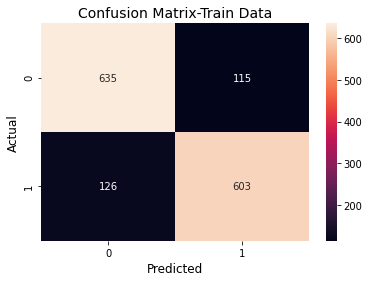

In [163]:
sns.heatmap(confusion_matrix(train_lab_bal, logit.predict(x_train_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Train Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

Text(33.0, 0.5, 'Actual')

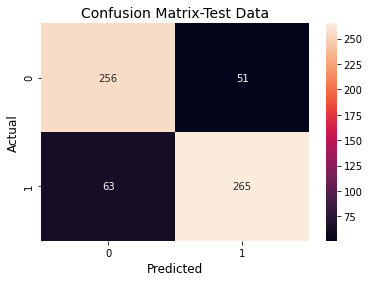

In [164]:
sns.heatmap(confusion_matrix(test_lab_bal, logit.predict(x_test_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Test Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

#### ROC curve and AUC Score

ROC AUC SCORE 0.9039359853680841


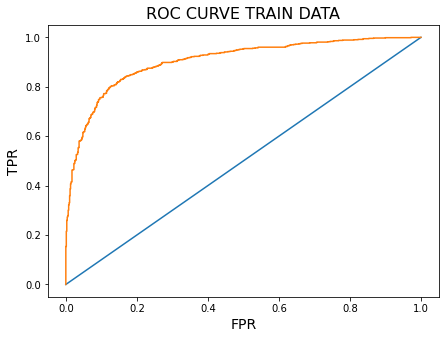

In [165]:
print('ROC AUC SCORE',roc_auc_score(train_lab_bal, logit.predict_proba(x_train_bal)[:,1]))
fpr,tpr,threshold = roc_curve(train_lab_bal,logit.predict_proba(x_train_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TRAIN DATA',fontsize =16)
plt.show()

ROC AUC SCORE 0.8946631445141813


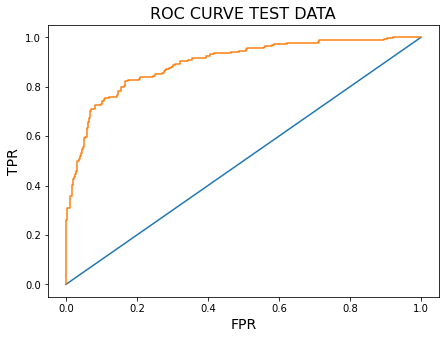

In [166]:
print('ROC AUC SCORE',roc_auc_score(test_lab_bal, logit.predict_proba(x_test_bal)[:,1]))
fpr,tpr,threshold = roc_curve(test_lab_bal,logit.predict_proba(x_test_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

### Performance Check: LDA with SMOTE

#### Classification Report

In [167]:
print(classification_report(train_lab_bal, lda.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       750
           1       0.84      0.83      0.83       729

    accuracy                           0.84      1479
   macro avg       0.84      0.83      0.83      1479
weighted avg       0.84      0.84      0.84      1479



In [168]:
print(classification_report(test_lab_bal, lda.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       307
           1       0.84      0.80      0.82       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



#### Confusion Matrix

Text(33.0, 0.5, 'Actual')

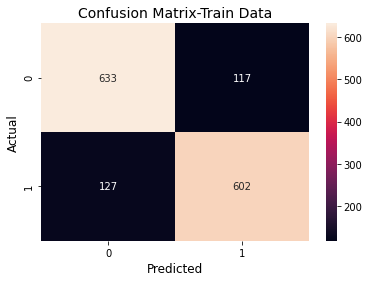

In [169]:
sns.heatmap(confusion_matrix(train_lab_bal, lda.predict(x_train_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Train Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

Text(33.0, 0.5, 'Actual')

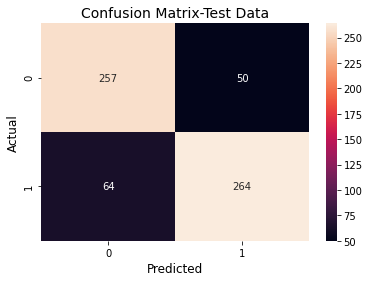

In [170]:
sns.heatmap(confusion_matrix(test_lab_bal, lda.predict(x_test_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Test Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

#### ROC Curve and AUC Score

ROC AUC SCORE 0.9036780978509373


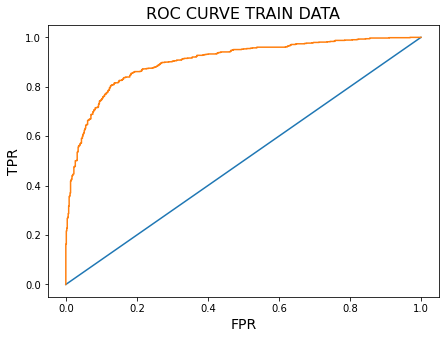

In [171]:
print('ROC AUC SCORE',roc_auc_score(train_lab_bal, lda.predict_proba(x_train_bal)[:,1]))
fpr,tpr,threshold = roc_curve(train_lab_bal,lda.predict_proba(x_train_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TRAIN DATA',fontsize =16)
plt.show()

ROC AUC SCORE 0.8944645268928259


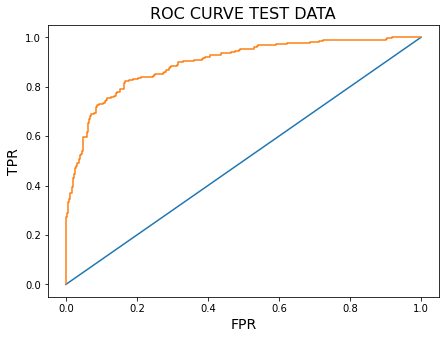

In [172]:
print('ROC AUC SCORE',roc_auc_score(test_lab_bal, lda.predict_proba(x_test_bal)[:,1]))
fpr,tpr,threshold = roc_curve(test_lab_bal,lda.predict_proba(x_test_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

### Performance check: KNN SMOTE

#### Classification Report

In [173]:
print(classification_report(train_lab_bal, best_knn.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       750
           1       0.86      0.73      0.79       729

    accuracy                           0.80      1479
   macro avg       0.81      0.80      0.80      1479
weighted avg       0.81      0.80      0.80      1479



In [174]:
print(classification_report(test_lab_bal, best_knn.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       307
           1       0.83      0.71      0.76       328

    accuracy                           0.77       635
   macro avg       0.78      0.78      0.77       635
weighted avg       0.78      0.77      0.77       635



#### Confusion Matrix

Text(33.0, 0.5, 'Actual')

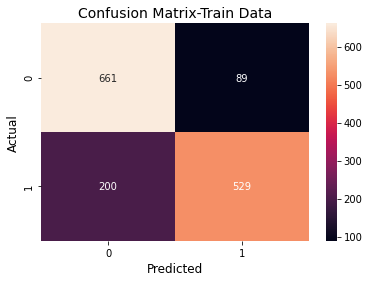

In [175]:
sns.heatmap(confusion_matrix(train_lab_bal, best_knn.predict(x_train_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Train Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

Text(33.0, 0.5, 'Actual')

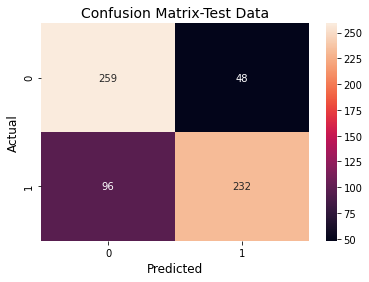

In [176]:
sns.heatmap(confusion_matrix(test_lab_bal, best_knn.predict(x_test_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Test Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

#### ROC Curve and AUC Score

ROC AUC SCORE 0.8960667581161409


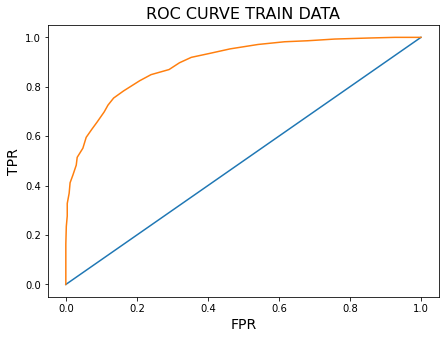

In [177]:
print('ROC AUC SCORE',roc_auc_score(train_lab_bal, best_knn.predict_proba(x_train_bal)[:,1]))
fpr,tpr,threshold = roc_curve(train_lab_bal,best_knn.predict_proba(x_train_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TRAIN DATA',fontsize =16)
plt.show()

ROC AUC SCORE 0.8700444903471836


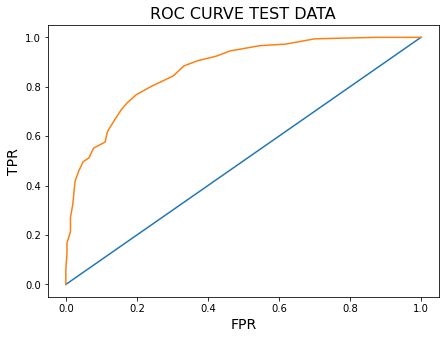

In [178]:
print('ROC AUC SCORE',roc_auc_score(test_lab_bal, best_knn.predict_proba(x_test_bal)[:,1]))
fpr,tpr,threshold = roc_curve(test_lab_bal,best_knn.predict_proba(x_test_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

### Performance metrics: Naive Bayes

In [179]:
print(classification_report(train_lab_bal, NB.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       750
           1       0.82      0.83      0.83       729

    accuracy                           0.83      1479
   macro avg       0.83      0.83      0.83      1479
weighted avg       0.83      0.83      0.83      1479



In [180]:
print(classification_report(test_lab_bal, NB.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       307
           1       0.82      0.83      0.82       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



#### Confusion matrix

Text(33.0, 0.5, 'Actual')

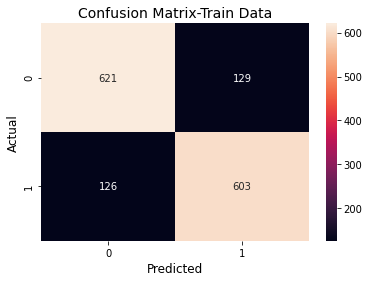

In [181]:
sns.heatmap(confusion_matrix(train_lab_bal, NB.predict(x_train_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Train Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

Text(33.0, 0.5, 'Actual')

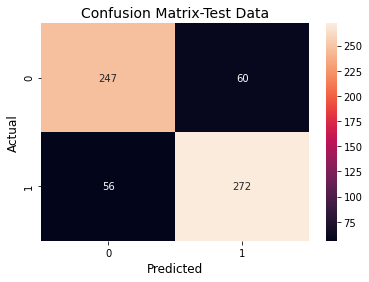

In [182]:
sns.heatmap(confusion_matrix(test_lab_bal, NB.predict(x_test_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Test Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

#### ROC Curve and AUC Score

ROC AUC SCORE 0.9034476451760403


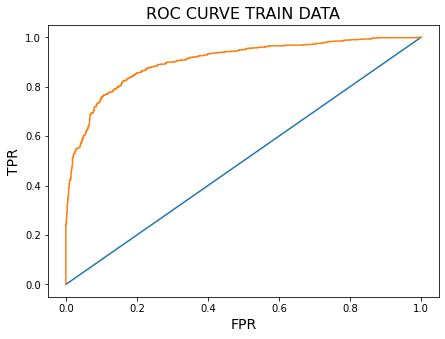

In [183]:
print('ROC AUC SCORE',roc_auc_score(train_lab_bal, NB.predict_proba(x_train_bal)[:,1]))
fpr,tpr,threshold = roc_curve(train_lab_bal,NB.predict_proba(x_train_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TRAIN DATA',fontsize =16)
plt.show()

ROC AUC SCORE 0.8969671089219036


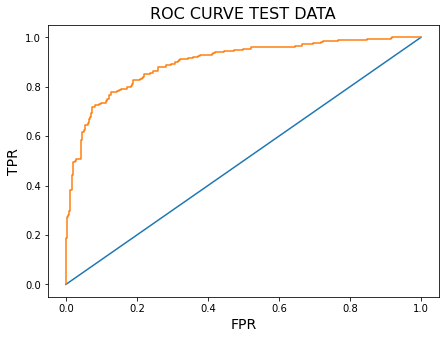

In [184]:
print('ROC AUC SCORE',roc_auc_score(test_lab_bal, NB.predict_proba(x_test_bal)[:,1]))
fpr,tpr,threshold = roc_curve(test_lab_bal,NB.predict_proba(x_test_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

### Perfromance Metrics: ADA Boost with Base estimator as Optimized RFCL and SMOTE

#### Classification Report

In [185]:
print(classification_report(train_lab_bal, Ada_boost.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       750
           1       0.85      0.97      0.90       729

    accuracy                           0.90      1479
   macro avg       0.91      0.90      0.90      1479
weighted avg       0.91      0.90      0.90      1479



In [186]:
print(classification_report(test_lab_bal, Ada_boost.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       307
           1       0.87      0.96      0.91       328

    accuracy                           0.90       635
   macro avg       0.91      0.90      0.90       635
weighted avg       0.91      0.90      0.90       635



#### Confusion Matrix

Text(33.0, 0.5, 'Actual')

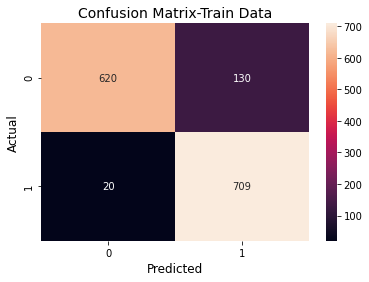

In [187]:
sns.heatmap(confusion_matrix(train_lab_bal, Ada_boost.predict(x_train_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Train Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

Text(33.0, 0.5, 'Actual')

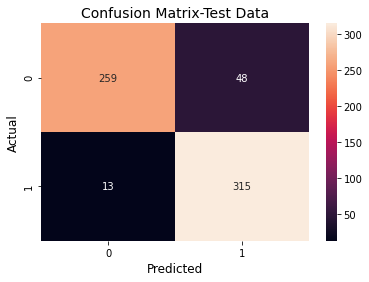

In [188]:
sns.heatmap(confusion_matrix(test_lab_bal, Ada_boost.predict(x_test_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Test Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

#### ROC Curve and AUC Score

ROC AUC SCORE 0.9592994970278921


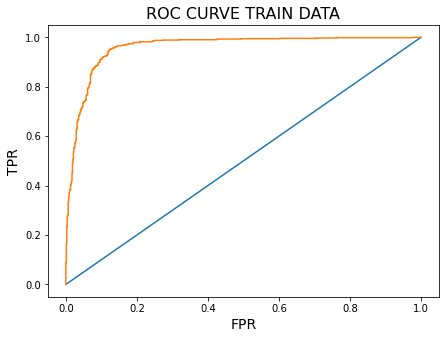

In [189]:
print('ROC AUC SCORE',roc_auc_score(train_lab_bal, Ada_boost.predict_proba(x_train_bal)[:,1]))
fpr,tpr,threshold = roc_curve(train_lab_bal,Ada_boost.predict_proba(x_train_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TRAIN DATA',fontsize =16)
plt.show()

ROC AUC SCORE 0.9497696035592278


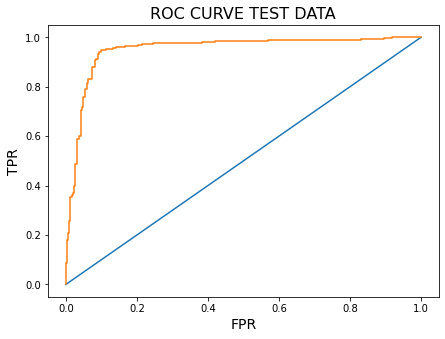

In [190]:
print('ROC AUC SCORE',roc_auc_score(test_lab_bal, Ada_boost.predict_proba(x_test_bal)[:,1]))
fpr,tpr,threshold = roc_curve(test_lab_bal,Ada_boost.predict_proba(x_test_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

### Gradient Boost

In [191]:
print(classification_report(train_lab_bal, gboost.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       750
           1       0.91      0.87      0.89       729

    accuracy                           0.90      1479
   macro avg       0.90      0.89      0.90      1479
weighted avg       0.90      0.90      0.90      1479



In [192]:
print(classification_report(test_lab_bal, gboost.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       307
           1       0.87      0.82      0.84       328

    accuracy                           0.84       635
   macro avg       0.85      0.85      0.84       635
weighted avg       0.85      0.84      0.84       635



Text(33.0, 0.5, 'Actual')

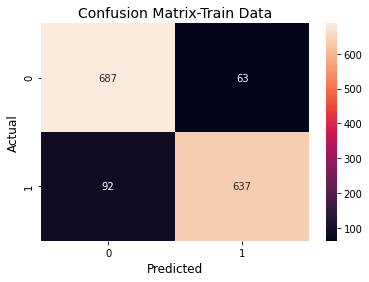

In [193]:
sns.heatmap(confusion_matrix(train_lab_bal, gboost.predict(x_train_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Train Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

Text(33.0, 0.5, 'Actual')

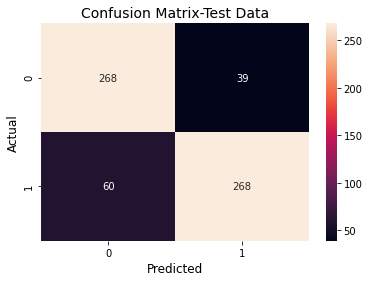

In [194]:
sns.heatmap(confusion_matrix(test_lab_bal, gboost.predict(x_test_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Test Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

#### ROC Curve and AUC Score

ROC AUC SCORE 0.9573461362597164


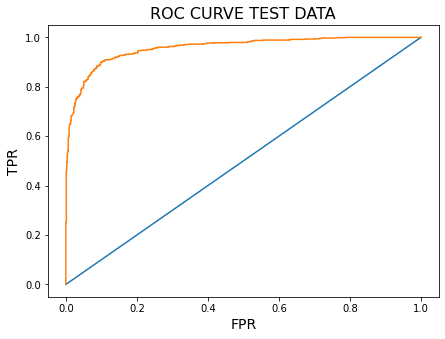

In [195]:
print('ROC AUC SCORE',roc_auc_score(train_lab_bal, gboost.predict_proba(x_train_bal)[:,1]))
fpr,tpr,threshold = roc_curve(train_lab_bal,gboost.predict_proba(x_train_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

ROC AUC SCORE 0.9225341622308731


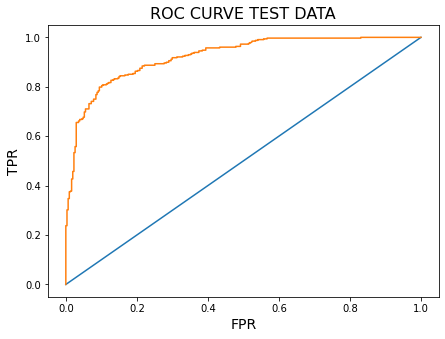

In [196]:
print('ROC AUC SCORE',roc_auc_score(test_lab_bal, gboost.predict_proba(x_test_bal)[:,1]))
fpr,tpr,threshold = roc_curve(test_lab_bal,gboost.predict_proba(x_test_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

### Bagging

#### Classification Report

In [197]:
print(classification_report(train_lab_bal, bgcl.predict(x_train_bal)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       750
           1       0.86      0.78      0.82       729

    accuracy                           0.83      1479
   macro avg       0.83      0.83      0.83      1479
weighted avg       0.83      0.83      0.83      1479



In [198]:
print(classification_report(test_lab_bal, bgcl.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       307
           1       0.87      0.77      0.81       328

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



#### Confusion Matrix

Text(33.0, 0.5, 'Actual')

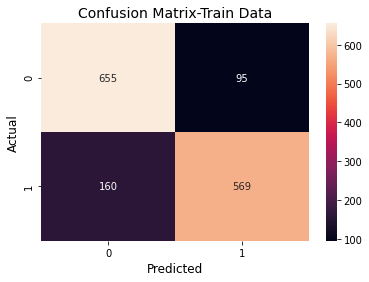

In [199]:
sns.heatmap(confusion_matrix(train_lab_bal, bgcl.predict(x_train_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Train Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

Text(33.0, 0.5, 'Actual')

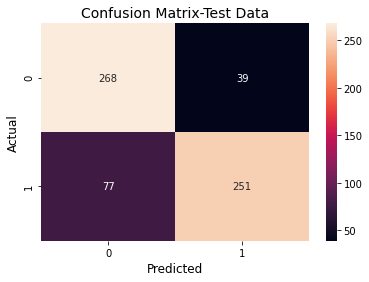

In [200]:
sns.heatmap(confusion_matrix(test_lab_bal, bgcl.predict(x_test_bal)), annot = True, fmt = 'd');
plt.title('Confusion Matrix-Test Data', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

#### ROC Curve and AUC Score

ROC AUC SCORE 0.9072674897119342


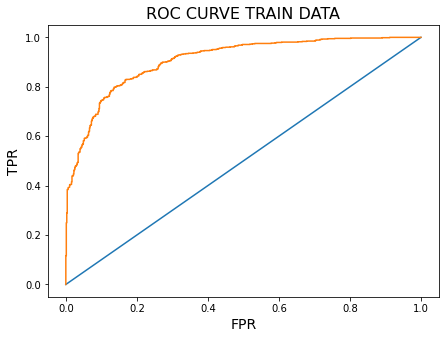

In [201]:
print('ROC AUC SCORE',roc_auc_score(train_lab_bal, bgcl.predict_proba(x_train_bal)[:,1]))
fpr,tpr,threshold = roc_curve(train_lab_bal,bgcl.predict_proba(x_train_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TRAIN DATA',fontsize =16)
plt.show()

ROC AUC SCORE 0.8966791133709382


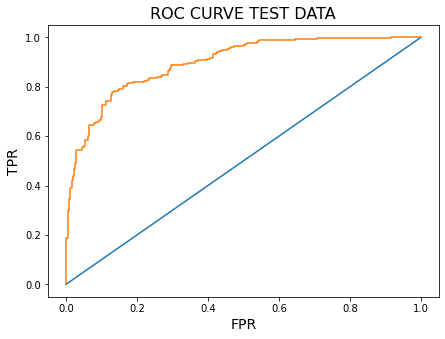

In [202]:
print('ROC AUC SCORE',roc_auc_score(test_lab_bal, bgcl.predict_proba(x_test_bal)[:,1]))
fpr,tpr,threshold = roc_curve(test_lab_bal,bgcl.predict_proba(x_test_bal)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()

### ROC Curves Comparison: Train Data

In [210]:
fpr_logit,tpr_logit,threshold_logit = roc_curve(train_lab_bal,logit.predict_proba(x_train_bal)[:,1])
fpr_lda,tpr_lda,threshold_lda = roc_curve(train_lab_bal,lda.predict_proba(x_train_bal)[:,1])
fpr_knn,tpr_knn,threshold_knn = roc_curve(train_lab_bal,best_knn.predict_proba(x_train_bal)[:,1])
fpr_NB,tpr_NB,threshold_NB = roc_curve(train_lab_bal,NB.predict_proba(x_train_bal)[:,1])
fpr_Ada,tpr_Ada,threshold_Ada = roc_curve(train_lab_bal,Ada_boost.predict_proba(x_train_bal)[:,1])
fpr_gboost,tpr_gboost,threshold_gboost = roc_curve(train_lab_bal,gboost.predict_proba(x_train_bal)[:,1])
fpr_bgcl,tpr_bgcl,threshold_bgcl = roc_curve(train_lab_bal,bgcl.predict_proba(x_train_bal)[:,1])

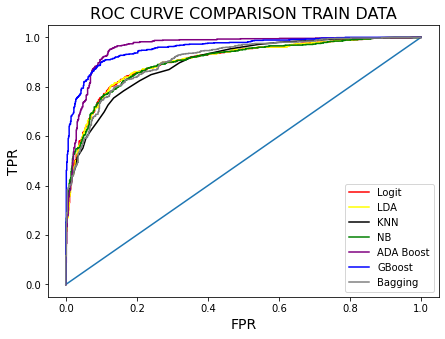

In [212]:
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr_logit, tpr_logit, color = 'red', label = 'Logit')
plt.plot(fpr_lda, tpr_lda, color = 'yellow', label = 'LDA')
plt.plot(fpr_knn, tpr_knn, color = 'black', label = 'KNN')
plt.plot(fpr_NB, tpr_NB, color = 'green', label = 'NB')
plt.plot(fpr_Ada, tpr_Ada, color = 'purple',label = 'ADA Boost')
plt.plot(fpr_gboost, tpr_gboost, color = 'blue', label = 'GBoost')
plt.plot(fpr_bgcl, tpr_bgcl, color = 'grey', label = 'Bagging')

plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE COMPARISON TRAIN DATA', fontsize = 16)
plt.legend()
plt.show()

In [213]:
fpr_logit,tpr_logit,threshold_logit = roc_curve(test_lab_bal,logit.predict_proba(x_test_bal)[:,1])
fpr_lda,tpr_lda,threshold_lda = roc_curve(test_lab_bal,lda.predict_proba(x_test_bal)[:,1])
fpr_knn,tpr_knn,threshold_knn = roc_curve(test_lab_bal,best_knn.predict_proba(x_test_bal)[:,1])
fpr_NB,tpr_NB,threshold_NB = roc_curve(test_lab_bal,NB.predict_proba(x_test_bal)[:,1])
fpr_Ada,tpr_Ada,threshold_Ada = roc_curve(test_lab_bal,Ada_boost.predict_proba(x_test_bal)[:,1])
fpr_gboost,tpr_gboost,threshold_gboost = roc_curve(test_lab_bal,gboost.predict_proba(x_test_bal)[:,1])
fpr_bgcl,tpr_bgcl,threshold_bgcl = roc_curve(test_lab_bal,bgcl.predict_proba(x_test_bal)[:,1])

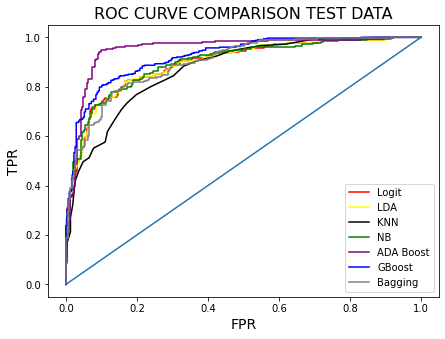

In [214]:
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr_logit, tpr_logit, color = 'red', label = 'Logit')
plt.plot(fpr_lda, tpr_lda, color = 'yellow', label = 'LDA')
plt.plot(fpr_knn, tpr_knn, color = 'black', label = 'KNN')
plt.plot(fpr_NB, tpr_NB, color = 'green', label = 'NB')
plt.plot(fpr_Ada, tpr_Ada, color = 'purple',label = 'ADA Boost')
plt.plot(fpr_gboost, tpr_gboost, color = 'blue', label = 'GBoost')
plt.plot(fpr_bgcl, tpr_bgcl, color = 'grey', label = 'Bagging')

plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE COMPARISON TEST DATA', fontsize = 16)
plt.legend()
plt.show()